In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn
seaborn.set()

In [23]:
raw_data = pd.read_csv('Cust_Segmentation.csv')
raw_data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [24]:
data_x1 = raw_data.drop(['Address'], axis= 1)
data_x1.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [25]:
inputs = data_x1.values[:, 1:]
inputs = np.nan_to_num(inputs)
scaled_inputs = StandardScaler().fit(inputs).transform(inputs)
scaled_inputs

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

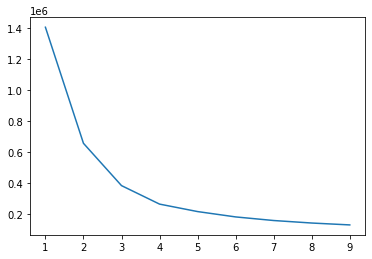

In [26]:
wcss = []
for i in range (1, 10):
    k_means = KMeans(i)
    k_means.fit(inputs)
    wcss.append(k_means.inertia_)
plt.plot(range(1,10), wcss)

In [27]:
k = 4
kmean = KMeans(4).fit(inputs)
labels = kmean.labels_
labels

array([1, 3, 0, 1, 2, 0, 0, 0, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 3, 0, 1, 1, 0, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 3, 1, 1, 1, 0, 1, 3, 0, 0, 0, 3, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 3, 3, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       2, 1, 3, 1, 1, 1, 1, 0, 1, 2, 3, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 3, 1, 1, 1, 1, 3, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 3, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 3, 3, 1, 3, 1,
       0, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [28]:
data_x1['Clus_km'] = labels
data_x2 = data_x1
data_x2.copy()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,3
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8,1
846,847,28,2,7,34,0.359,2.021,0.0,7.0,1
847,848,25,4,0,18,2.802,3.210,1.0,33.4,1
848,849,32,1,12,28,0.116,0.696,0.0,2.9,1


In [29]:
inputs[:, 3]

array([ 19., 100.,  57.,  19., 253.,  81.,  56.,  64.,  18., 115.,  88.,
        40.,  18.,  30.,  20.,  16.,  17.,  26.,  61.,  32.,  25.,  43.,
        47.,  77., 123.,  66.,  21.,  38.,  59.,  45., 100.,  55.,  42.,
        28.,  45.,  37.,  37.,  18.,  18., 126.,  14., 113.,  34., 177.,
        27.,  84.,  14.,  21.,  19.,  61.,  81.,  33.,  19.,  66.,  70.,
        25.,  20.,  26.,  64.,  36.,  60.,  34.,  67.,  74.,  20.,  44.,
        79.,  27.,  23.,  14.,  61.,  75.,  98.,  42.,  33.,  18.,  45.,
        21., 145.,  55.,  68.,  65., 157.,  42.,  51.,  15.,  25.,  16.,
        31.,  32.,  75.,  33.,  21.,  20.,  27.,  49.,  27.,  34.,  28.,
        20.,  33., 126.,  60.,  48.,  22.,  50.,  32.,  27.,  54.,  82.,
        53.,  32.,  39.,  16.,  23.,  32.,  18.,  46.,  63.,  26.,  21.,
        37.,  32.,  53.,  42.,  72.,  47.,  25.,  21.,  16.,  36.,  57.,
        25.,  23.,  25.,  29.,  86.,  19.,  31.,  35.,  41.,  21.,  40.,
        23.,  68.,  30.,  58.,  43.,  42.,  26.,  3

Text(0, 0.5, 'INCOME')

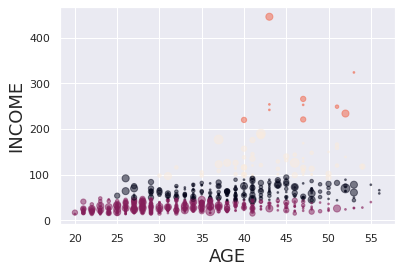

In [37]:
area = np.pi * ( inputs[:, 1]) ** 2
plt.scatter(inputs[:, 0], inputs[:, 3], s= area, c= labels.astype(float), alpha=0.5)
plt.xlabel('AGE', fontsize=18)
plt.ylabel('INCOME', fontsize=18)